/l_mnt/python/envs/teaching/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/l_mnt/python/envs/teaching/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Best K for Inertia: 10
Best K for Silhouette Score: 2
Best K for Davies-Bouldin Score: 2
Best K for Gap Statistics: 2


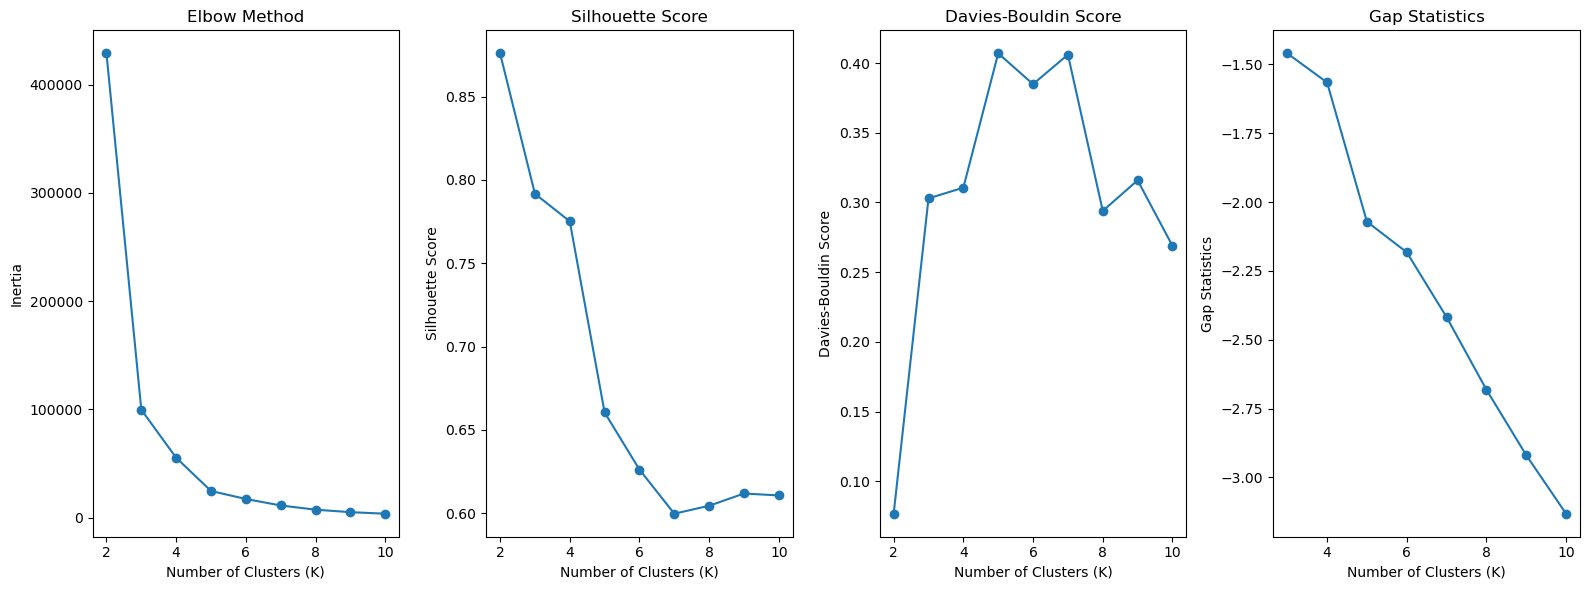

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

# Step 1: Read and preprocess the Roary Rtab file
roary_rtab_file = 'extremophiles.csv'
df = pd.read_csv(roary_rtab_file, index_col='Gene')

# Create a new DataFrame with desired amount of rows for your analysis depending on your local machine computing power here we gonna take all features aka all rows for analysis
new_df = df   # .iloc[:10000]

# Transpose the DataFrame to have samples in rows and features in columns
transposed_df = new_df.T

# Standardize the data (normalize)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(transposed_df)

# Step 2: Perform PCA
n_components = 2  # Number of components for PCA, you can adjust this
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)

# Step 3: Perform k-means clustering with different K values
K_range = range(2, 11)
inertia_values = []
silhouette_scores = []
davies_bouldin_scores = []
gap_values = []

best_inertia_k = None
best_silhouette_k = None
best_davies_bouldin_k = None
best_gap_k = None

for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=2)
    kmeans.fit(pca_data)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_data, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(pca_data, kmeans.labels_))
    
    gap = np.log(inertia_values[-1]) - np.log(np.mean(inertia_values[:-1]))
    gap_values.append(gap)

    if best_inertia_k is None or inertia_values[k - 2] < inertia_values[best_inertia_k - 2]:
        best_inertia_k = k
    if best_silhouette_k is None or silhouette_scores[k - 2] > silhouette_scores[best_silhouette_k - 2]:
        best_silhouette_k = k
    if best_davies_bouldin_k is None or davies_bouldin_scores[k - 2] < davies_bouldin_scores[best_davies_bouldin_k - 2]:
        best_davies_bouldin_k = k
    if best_gap_k is None or gap_values[k - 2] > gap_values[best_gap_k - 2]:
        best_gap_k = k

print(f'Best K for Inertia: {best_inertia_k}')
print(f'Best K for Silhouette Score: {best_silhouette_k}')
print(f'Best K for Davies-Bouldin Score: {best_davies_bouldin_k}')
print(f'Best K for Gap Statistics: {best_gap_k}')

# Plot the results
plt.figure(figsize=(16, 6))

plt.subplot(1, 4, 1)
plt.plot(K_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 4, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.subplot(1, 4, 3)
plt.plot(K_range, davies_bouldin_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score')

plt.subplot(1, 4, 4)
plt.plot(K_range, gap_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Gap Statistics')
plt.title('Gap Statistics')

plt.tight_layout()
plt.show()


/l_mnt/python/envs/teaching/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/l_mnt/python/envs/teaching/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


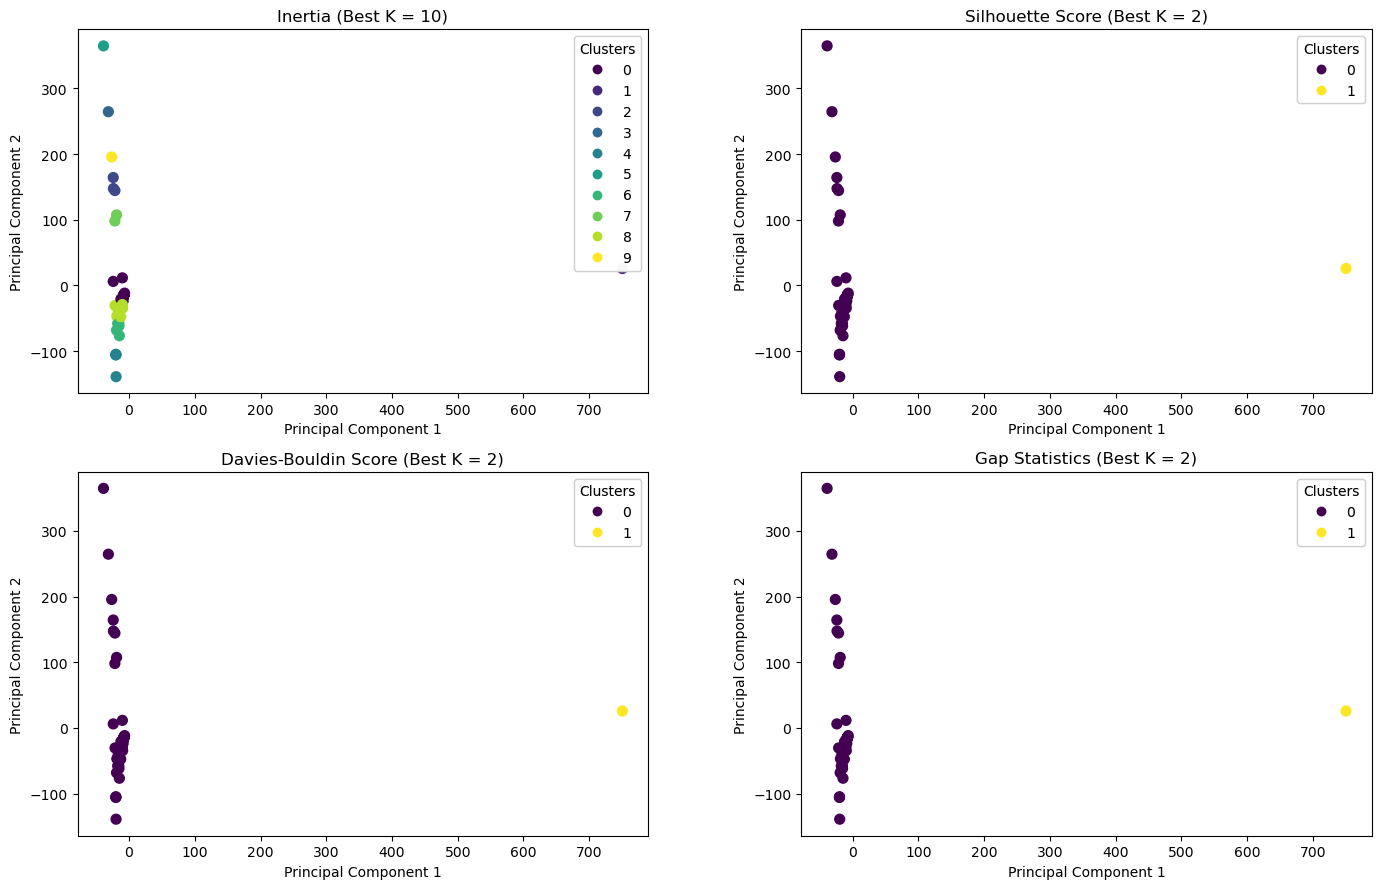

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Set the parameters
K_range = range(2, 11)  # You can adjust the range based on your requirements

inertia_values = []
silhouette_scores = []
davies_bouldin_scores = []
gap_values = []

best_inertia_k = None
best_silhouette_k = None
best_davies_bouldin_k = None
best_gap_k = None

for k in K_range:
    # Fit KMeans and calculate inertia, silhouette score, and Davies-Bouldin score for the data
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Explicitly set n_init
    kmeans.fit(pca_data)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_data, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(pca_data, kmeans.labels_))

    # Calculate gap statistics
    gap = np.log(inertia_values[-1]) - np.log(np.mean(inertia_values[:-1]))
    gap_values.append(gap)

    # Save the best K for each metric
    if best_inertia_k is None or inertia_values[k - 2] < inertia_values[best_inertia_k - 2]:
        best_inertia_k = k
    if best_silhouette_k is None or silhouette_scores[k - 2] > silhouette_scores[best_silhouette_k - 2]:
        best_silhouette_k = k
    if best_davies_bouldin_k is None or davies_bouldin_scores[k - 2] < davies_bouldin_scores[best_davies_bouldin_k - 2]:
        best_davies_bouldin_k = k
    if best_gap_k is None or gap_values[k - 2] > gap_values[best_gap_k - 2]:
        best_gap_k = k

# Create KMeans instances for the best K values from different metrics
best_inertia_kmeans = KMeans(n_clusters=best_inertia_k, n_init=10, random_state=42)
best_silhouette_kmeans = KMeans(n_clusters=best_silhouette_k, n_init=10, random_state=42)
best_davies_bouldin_kmeans = KMeans(n_clusters=best_davies_bouldin_k, n_init=10, random_state=42)
best_gap_kmeans = KMeans(n_clusters=best_gap_k, n_init=10, random_state=42)

# Fit KMeans to the pca_data
best_inertia_kmeans.fit(pca_data)
best_silhouette_kmeans.fit(pca_data)
best_davies_bouldin_kmeans.fit(pca_data)
best_gap_kmeans.fit(pca_data)

# Get cluster labels for the best K values
best_inertia_labels = best_inertia_kmeans.labels_
best_silhouette_labels = best_silhouette_kmeans.labels_
best_davies_bouldin_labels = best_davies_bouldin_kmeans.labels_
best_gap_labels = best_gap_kmeans.labels_

# Create a figure with subplots
plt.figure(figsize=(15, 9))
plt.subplots_adjust(hspace=0.4)

# Plot for best Inertia clusters
plt.subplot(2, 2, 1)
scatter1 = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=best_inertia_labels, cmap='viridis', s=50, label='Data Points')
plt.title(f'Inertia (Best K = {best_inertia_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.gca().set_aspect('equal')
legend1 = plt.legend(*scatter1.legend_elements(), title="Clusters", loc='upper right')
plt.gca().add_artist(legend1)

# Plot for best Silhouette Score clusters
plt.subplot(2, 2, 2)
scatter2 = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=best_silhouette_labels, cmap='viridis', s=50, label='Data Points')
plt.title(f'Silhouette Score (Best K = {best_silhouette_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.gca().set_aspect('equal')
legend2 = plt.legend(*scatter2.legend_elements(), title="Clusters", loc='upper right')
plt.gca().add_artist(legend2)

# Plot for best Davies-Bouldin Score clusters
plt.subplot(2, 2, 3)
scatter3 = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=best_davies_bouldin_labels, cmap='viridis', s=50, label='Data Points')
plt.title(f'Davies-Bouldin Score (Best K = {best_davies_bouldin_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.gca().set_aspect('equal')
legend3 = plt.legend(*scatter3.legend_elements(), title="Clusters", loc='upper right')
plt.gca().add_artist(legend3)

# Plot for best Gap Statistics clusters
plt.subplot(2, 2, 4)
scatter4 = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=best_gap_labels, cmap='viridis', s=50, label='Data Points')
plt.title(f'Gap Statistics (Best K = {best_gap_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.gca().set_aspect('equal')
legend4 = plt.legend(*scatter4.legend_elements(), title="Clusters", loc='upper right')
plt.gca().add_artist(legend4)

plt.tight_layout()
plt.show()


Best k value: 5
Explanation: The best k value was determined by aggregating the ranks from four different statistical methods: Inertia, Silhouette Score, Davies-Bouldin Index, and Gap Statistics. The k value with the lowest average rank across these methods was selected as the best choice.


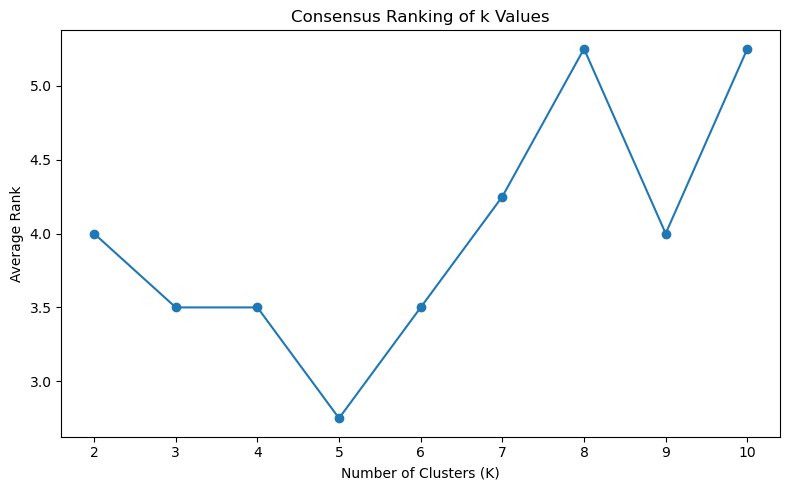

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Set the parameters
K_range = range(2, 11)  # You can adjust the range based on your requirements

# Calculate ranks for each metric
inertia_ranks = {k: rank for rank, k in enumerate(sorted(K_range, key=lambda k: inertia_values[k - min(K_range)]))}
silhouette_scores_ranks = {k: rank for rank, k in enumerate(sorted(K_range, key=lambda k: -silhouette_scores[k - min(K_range)]))}
db_scores_ranks = {k: rank for rank, k in enumerate(sorted(K_range, key=lambda k: -davies_bouldin_scores[k - min(K_range)]))}
gap_values_ranks = {k: rank for rank, k in enumerate(sorted(K_range, key=lambda k: -gap_values[k - min(K_range)]))}

# Calculate the average rank for each k value across all methods
average_ranks = {}
for k in K_range:
    average_ranks[k] = (inertia_ranks[k] + silhouette_scores_ranks[k] + db_scores_ranks[k] + gap_values_ranks[k]) / 4

# Choose the k value with the lowest average rank
best_k = min(average_ranks, key=average_ranks.get)

# Explanation for the chosen k value
explanation = "The best k value was determined by aggregating the ranks from four different statistical methods: Inertia, Silhouette Score, Davies-Bouldin Index, and Gap Statistics. The k value with the lowest average rank across these methods was selected as the best choice."

# Print the results and explanation
print(f"Best k value: {best_k}")
print(f"Explanation: {explanation}")

# Create a dot plot of the k values
plt.figure(figsize=(8, 5))
plt.plot(K_range, average_ranks.values(), marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Rank')
plt.title('Consensus Ranking of k Values')
plt.xticks(K_range)
plt.tight_layout()
plt.show()


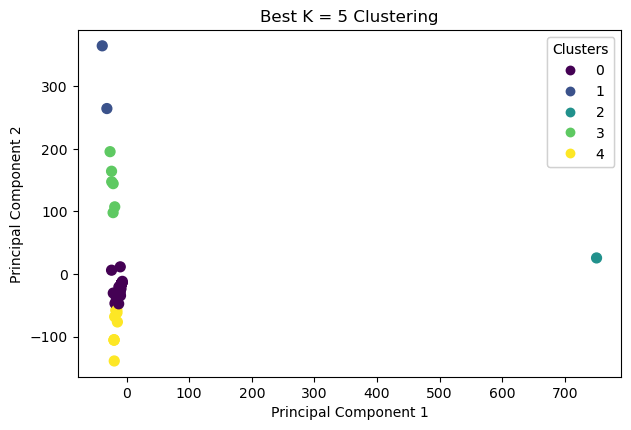

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Set the parameters
K_range = range(2, 11)  # You can adjust the range based on your requirements

# Choose the k value with the lowest average rank
best_k = min(average_ranks, key=average_ranks.get)

# Create KMeans instance for the best number of clusters
best_kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=42)

# Fit KMeans to the data
best_kmeans.fit(pca_data)  # Use the original pca_data here

# Assign cluster labels to the data points
best_labels = best_kmeans.labels_

# Create a figure with subplots
plt.figure(figsize=(12, 12))
plt.subplots_adjust(hspace=0.4)

# Plot for best K-means clusters
plt.subplot(2, 2, 1)
scatter1 = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=best_labels, cmap='viridis', s=50, label='Data Points')
plt.title(f'Best K = {best_k} Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.gca().set_aspect('equal')  # Set aspect ratio to equal
legend1 = plt.legend(*scatter1.legend_elements(), title="Clusters", loc='upper right')
plt.gca().add_artist(legend1)

plt.tight_layout()
plt.show()


Best k value: 5
Explanation: The best k value was determined by aggregating the ranks from four different statistical methods: Inertia, Silhouette Score, Davies-Bouldin Index, and Gap Statistics. The k value with the lowest average rank across these methods was selected as the best choice.
Cluster 0 samples:
GCA_000025125_1_ASM2512v1_genomic_fna
GCA_000829235_1_ASM82923v1_genomic_fna
GCA_003574135_1_ASM357413v1_genomic_fna

Cluster 1 samples:
GCA_000020025_1_ASM2002v1_genomic_fna
GCA_000196515_1_ASM19651v1_genomic_fna
GCA_000317695_1_ASM31769v1_genomic_fna
GCA_002813575_1_ASM281357v1_genomic_fna
GCA_003054475_1_ASM305447v1_genomic_fna
GCA_003443655_1_ASM344365v1_genomic_fna
GCA_009856605_1_ASM985660v1_genomic_fna
GCA_012516395_1_ASM1251639v1_genomic_fna
GCA_014023275_1_ASM1402327v1_genomic_fna
GCA_019056575_1_ASM1905657v1_genomic_fna
GCA_022376295_1_ASM2237629v1_genomic_fna
GCA_024584745_1_ASM2458474v1_genomic_fna

Cluster 2 samples:
GCA_000011345_1_ASM1134v1_genomic_fna
GCA_000017845_

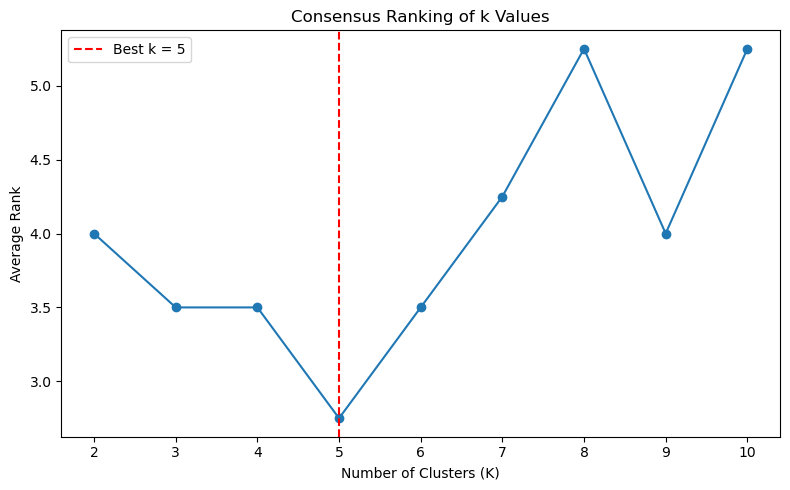

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Step 1: Read and preprocess the Roary Rtab file
roary_rtab_file = '50.csv'
df = pd.read_csv(roary_rtab_file, index_col='Gene')

# Create a new DataFrame with only 50 rows
new_df = df.iloc[:50]

# Transpose the DataFrame to have samples in rows and features in columns
transposed_df = new_df.T

# Standardize the data (normalize)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(transposed_df)

# Set the parameters
K_range = range(2, 11)  # You can adjust the range based on your requirements

# Calculate ranks for each metric
inertia_ranks = {k: rank for rank, k in enumerate(sorted(K_range, key=lambda k: inertia_values[k - min(K_range)]))}
silhouette_scores_ranks = {k: rank for rank, k in enumerate(sorted(K_range, key=lambda k: -silhouette_scores[k - min(K_range)]))}
db_scores_ranks = {k: rank for rank, k in enumerate(sorted(K_range, key=lambda k: -davies_bouldin_scores[k - min(K_range)]))}
gap_values_ranks = {k: rank for rank, k in enumerate(sorted(K_range, key=lambda k: -gap_values[k - min(K_range)]))}

# Calculate the average rank for each k value across all methods
average_ranks = {}
for k in K_range:
    average_ranks[k] = (inertia_ranks[k] + silhouette_scores_ranks[k] + db_scores_ranks[k] + gap_values_ranks[k]) / 4

# Choose the k value with the lowest average rank
best_k = min(average_ranks, key=average_ranks.get)

# Explanation for the chosen k value
explanation = "The best k value was determined by aggregating the ranks from four different statistical methods: Inertia, Silhouette Score, Davies-Bouldin Index, and Gap Statistics. The k value with the lowest average rank across these methods was selected as the best choice."

# Print the results and explanation
print(f"Best k value: {best_k}")
print(f"Explanation: {explanation}")

# Perform k-means clustering using the dynamically determined best_k
n_clusters = best_k
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the DataFrame
transposed_df['Cluster'] = cluster_labels

# Create a dictionary to store samples for each cluster
cluster_samples = {i: [] for i in range(n_clusters)}

# Populate the dictionary with sample names
for sample_name, cluster_label in zip(transposed_df.index, cluster_labels):
    cluster_samples[cluster_label].append(sample_name)

# Print the sample names for each cluster one under the other
for cluster_label, samples in cluster_samples.items():
    print(f"Cluster {cluster_label} samples:")
    for sample in samples:
        print(sample)
    print()

# Create a dot plot of the k values
plt.figure(figsize=(8, 5))
plt.plot(K_range, average_ranks.values(), marker='o')
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k = {best_k}')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Rank')
plt.title('Consensus Ranking of k Values')
plt.xticks(K_range)
plt.legend()
plt.tight_layout()
plt.show()
